The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 
In our experimrnt, we are going to use batch 1 and images are stored in following way:
data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [152]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

keras.__version__

'2.0.3'

In [153]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import tensorflow as tf
from keras import metrics
import seaborn as sns
%matplotlib inline
import os
import struct
import numpy as np
# from sklearn.preprocessing import RobustScaler
import pandas as pd
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import warnings
warnings.simplefilter('ignore', UserWarning)
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

#Handw_char = fetch_mldata('mnist original',target_name = 'digit',data_name = 'Handwirting')
#X = Handw_char.data
#y = Handw_char.target
#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, test_size=0.25, random_state=42)
## Let's do standard scaling
#X_train = X_train/255.0
#X_test = X_test/255.0

#NUM_CLASSES = 10
#img_wh = 28

#X_train_mlp = X_train
#X_test_mlp = X_test

In [177]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
CIFAR = unpickle('C:/data_batch_1')
X = CIFAR[b'data']
# Change color pictures into gray
X = X[:, 1024:2048]
y = np.array(CIFAR[b'labels'])
n_samples, n_features = X.shape

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))

NUM_CLASSES = np.unique(y).shape[0]

print("n_classes: %d" % NUM_CLASSES)

print("Values of data: {}" .format(np.unique(X)))

n_samples: 10000
n_features: 1024
n_classes: 10
Values of data: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230

First, we will scale X by standard scaling. And use one-hot to save labels which are originally represented by ints from 0 to 9. Notice that images in this dataset are color pictures. So we change then into gray images by only taking green channel and then save each image in one row with 1024 features. Features are represented by float type after scaling.

As cnn takes a very long time to train, so we will use function train_test_split to divide our data into training set and test set.

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
## Let's do standard scaling
X_train = X_train/255.0
X_test = X_test/255.0

NUM_CLASSES = 10
img_wh = 32

X_train_mlp = X_train
X_test_mlp = X_test

In [179]:
# NEW: Let's start by fixing the sizes
X_train = np.expand_dims(X_train.reshape((-1,img_wh,img_wh)), axis=3)
X_test = np.expand_dims(X_test.reshape((-1,img_wh,img_wh)), axis=3)
# the image data has been resized to (samples,image_rows,image_cols,image_channels)

# and one hot encoding the output values
y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

Number of instances: 10000
Number of instances in each class: 0: 1005 1: 974 2: 1032 3: 1016 4: 999 5: 937 6: 1030 7: 1001 8: 1025 9: 981


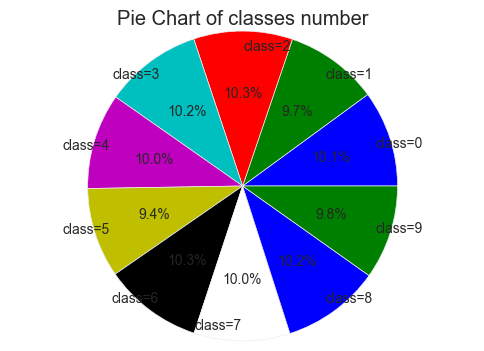

In [180]:
n_samples, n_features = X.shape
plt.style.use('ggplot')
print('Number of instances:',n_samples)
print('Number of instances in each class:','0:',sum(y == 0),'1:',sum(y == 1),
      '2:',sum(y == 2),'3:',sum(y == 3),'4:',sum(y == 4),'5:',sum(y == 5),'6:',sum(y == 6),
      '7:',sum(y == 7),'8:',sum(y == 8),'9:',sum(y == 9))
size=[sum(y==0),sum(y==1),sum(y==2),sum(y==3),sum(y==4),sum(y==5),sum(y==6),sum(y==7),sum(y==8),sum(y==9)]
plt.pie(
    size,
    # with the labels being platform
    labels=[u'class=0',u'class=1',u'class=2',u'class=3',u'class=4',u'class=5',u'class=6',u'class=7',u'class=8',u'class=9'],
    # with no shadows
    shadow=False,
    # stating our colors

    # with the start angle at 90%
    labeldistance = 0.9,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of classes number')

From the pie plot above, we can find that our dataset has a very ideal distribution which is almost evenly distributed. So it is resonable for us to choose accuracy as our metric in this lab. Because we want to predict object's type through image. High accuracy is quite important for applications like flower recogonition, object recogonition. 

In [182]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
# what if we just want to use the validation data??
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
l2_lambda = 0.0001
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'{:.4f}'.format(acc))

In [198]:
# Training MLP for later comparison
# make a keras MLP
mlp = Sequential()
mlp.add( Dense(input_dim=X_train_mlp.shape[1], units=100, activation='relu') )
mlp.add( Dense(units=50, activation='relu') )
mlp.add( Dense(units=50, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp.fit(X_train_mlp, y_train_ohe, 
        batch_size=128, epochs=20, 
        shuffle=True, verbose=1,
        validation_data=(X_test_mlp,y_test_ohe))

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 1s - loss: 2.2608 - acc: 0.1408 - val_loss: 2.2021 - val_acc: 0.1668
Epoch 2/20
7500/7500 [==============================] - 0s - loss: 2.1447 - acc: 0.2023 - val_loss: 2.1077 - val_acc: 0.1968
Epoch 3/20
7500/7500 [==============================] - 0s - loss: 2.0948 - acc: 0.2324 - val_loss: 2.0873 - val_acc: 0.2252
Epoch 4/20
7500/7500 [==============================] - 0s - loss: 2.0553 - acc: 0.2448 - val_loss: 2.0314 - val_acc: 0.2696
Epoch 5/20
7500/7500 [==============================] - 0s - loss: 2.0175 - acc: 0.2697 - val_loss: 1.9829 - val_acc: 0.2940
Epoch 6/20
7500/7500 [==============================] - 0s - loss: 1.9938 - acc: 0.2761 - val_loss: 2.0184 - val_acc: 0.2680
Epoch 7/20
7500/7500 [==============================] - 0s - loss: 1.9644 - acc: 0.2936 - val_loss: 1.9623 - val_acc: 0.2844
Epoch 8/20
7500/7500 [==============================] - 0s - loss: 1.9406 - a

In [187]:
# First let's try to use expansion
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None)

datagen.fit(X_train)

cnn = Sequential()

cnn.add(Conv2D(filters=32,
                input_shape = (img_wh,img_wh,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transformations
cnn.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                   steps_per_epoch=int(len(X_train)/2), # how many generators to go through per epoch
                   epochs=1, verbose=1,
                   validation_data=(X_test,y_test_ohe)
                  )

Epoch 1/1
3750/3750 [==============================] - 2993s - loss: 1.3027 - acc: 0.5428 - val_loss: 1.0598 - val_acc: 0.6388


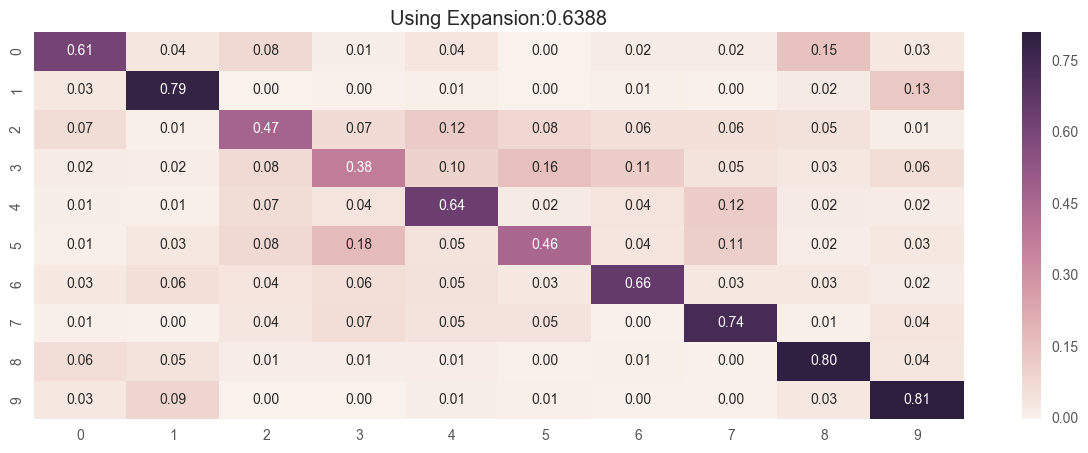

In [188]:
summarize_net(cnn, X_test, y_test, title_text='Using Expansion:')

In [29]:
#Let's visualize the results of the CNNs 
def print_result(score, title="",color="red"):
    plt.plot(range(len(score)), score, color=color,label=title)
    plt.ylabel('Val_Accuracy')      
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

In [203]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
# define a function calculates ROC
def cal_roc(model, X_test, y_test, title):
    plt.figure(figsize=(15,5))
    if model is not None:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        y_score = model.predict_proba(X_test)
        for i in range(NUM_CLASSES):
            fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label= i)
            roc_auc[i] = auc(fpr[i], tpr[i])
        lw = 1
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(NUM_CLASSES)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(NUM_CLASSES):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= NUM_CLASSES

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure()
        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green', 'yellow', 'red', 'cyan', 'black', 'magenta'])
        for i, color in zip(range(NUM_CLASSES), colors):
            plt.plot(fpr[i], tpr[i], lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s Receiver operating characteristic to multi-class' % title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2496/2500 [============================>.] - ETA: 0s

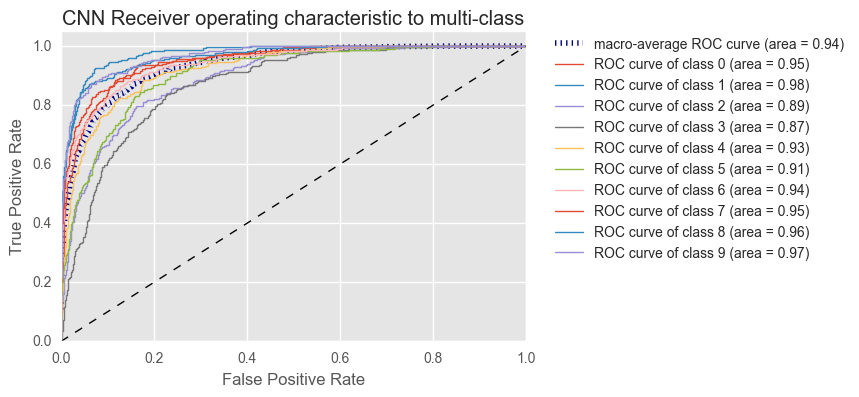

In [205]:
cal_roc(cnn, X_test, y_test, 'CNN')

2432/2500 [============================>.] - ETA: 0s

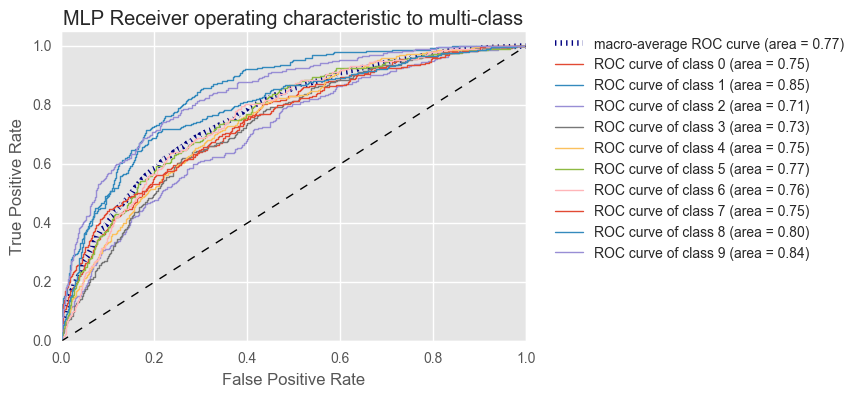

In [206]:
cal_roc(mlp, X_test_mlp, y_test, 'MLP')

In [207]:
# Exp+Reg+Init
# Use Kaiming He to regularize ReLU layers: https://arxiv.org/pdf/1502.01852.pdf
# Use Glorot/Bengio for linear/sigmoid/softmax: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf 
cnn1 = Sequential()

cnn1.add(Conv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')) # more compact syntax
cnn1.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn1.add(Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

# add one layer on flattened output
cnn1.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn1.add(Flatten())
cnn1.add(Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnn1.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn1.add(Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))

# Let's train the model 
cnn1.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
cnn1.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                  steps_per_epoch=int(len(X_train)/2), # how many generators to go through per epoch
                  epochs=3, verbose=1,
                  validation_data=(X_test,y_test_ohe),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
                 )

Epoch 1/3
3750/3750 [==============================] - 799s - loss: 1.3936 - acc: 0.5323 - val_loss: 1.1283 - val_acc: 0.6492
Epoch 2/3
3750/3750 [==============================] - 782s - loss: 1.1409 - acc: 0.6438 - val_loss: 1.1582 - val_acc: 0.6680
Epoch 3/3
3750/3750 [==============================] - 801s - loss: 1.1131 - acc: 0.6688 - val_loss: 1.2243 - val_acc: 0.6392


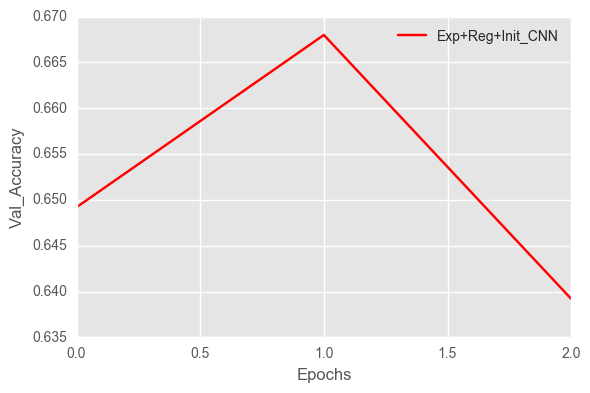

In [217]:
score1 = [0.6492, 0.6680, 0.6392]
print_result(score1, 'Exp+Reg+Init_CNN')

2432/2500 [============================>.] - ETA: 0s

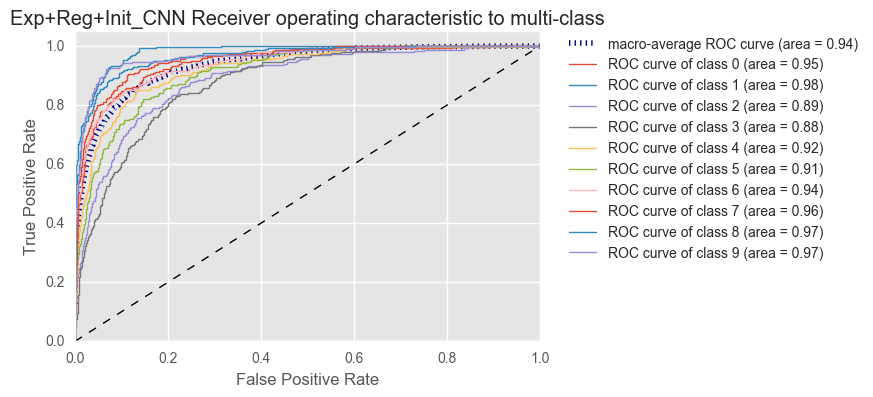

In [221]:
cal_roc(cnn1, X_test, y_test, 'Exp+Reg+Init_CNN')

In [213]:
# For fun let's try LetNet-5
from keras.layers import average 
from keras.models import Input, Model
# now lets use the LeNet architecture with batch norm
from keras.layers.normalization import BatchNormalization


from keras.layers import average 
from keras.models import Input, Model

# now lets use the LeNet architecture with batch norm
from keras.layers.normalization import BatchNormalization

lenet = Sequential()

lenet.add(Conv2D(filters=6,kernel_size=(5,5),
               input_shape = (img_wh,img_wh,1), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda)))
lenet.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
lenet.add(BatchNormalization())
lenet.add(Activation("sigmoid"))

lenet.add(Conv2D(filters=16,kernel_size=(5,5), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda)))
lenet.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
lenet.add(BatchNormalization())
lenet.add(Activation("sigmoid"))
#lenet.add(Dropout(0.5))

lenet.add(Conv2D(filters=120,kernel_size=(1,1), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda)))

lenet.add(Flatten())
lenet.add(Dense(84))
lenet.add(Activation("sigmoid"))
lenet.add(Dense(NUM_CLASSES))
lenet.add(Activation('softmax'))

lenet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
lenet.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                      steps_per_epoch=int(len(X_train)/2), # how many generators to go through per epoch
                      epochs=3, verbose=1,
                      validation_data=(X_test,y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Epoch 1/3
3750/3750 [==============================] - 377s - loss: 1.3476 - acc: 0.5377 - val_loss: 1.5172 - val_acc: 0.4916
Epoch 2/3
3750/3750 [==============================] - 390s - loss: 1.0568 - acc: 0.6394 - val_loss: 1.3132 - val_acc: 0.5636
Epoch 3/3
3750/3750 [==============================] - 433s - loss: 0.9519 - acc: 0.6760 - val_loss: 1.2680 - val_acc: 0.5876


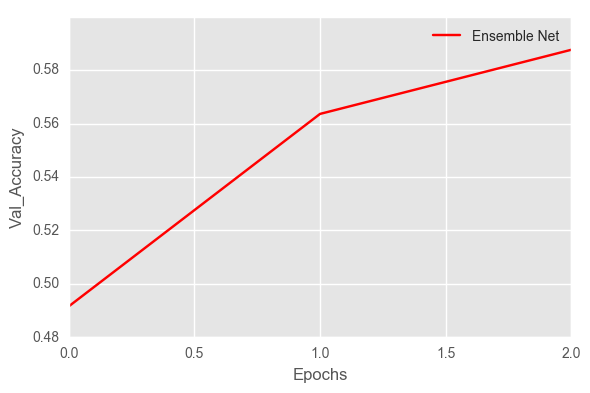

In [215]:
score2 = [0.4916, 0.5636, 0.5876]
print_result(score2, 'Ensemble Net')

CITATION:

Following code is written by Francois Chollet in The Keras Blog.

Github: https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py.

VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it. It was used to win the ILSVR (ImageNet) competition in 2014. To this day is it still considered to be an excellent vision model, although it has been somewhat outperformed by more revent advances such as Inception and ResNet.

In [238]:
# Exceptional work
'''Visualization of the filters of VGG16, via gradient ascent in input space.
This script can run on CPU in a few minutes (with the TensorFlow backend).
Results example: http://i.imgur.com/4nj4KjN.jpg
'''
from __future__ import print_function

from scipy.misc import imsave
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K

# dimensions of the generated pictures for each filter.
img_width = 128
img_height = 128

# the name of the layer we want to visualize
# (see model definition at keras/applications/vgg16.py)
layer_name = 'block5_conv1'

# util function to convert a tensor into a valid image


def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# build the VGG16 network with ImageNet weights
model = vgg16.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

model.summary()

# this is the placeholder for the input images
input_img = model.input

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])


def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)


kept_filters = []
for filter_index in range(0, 200):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 3, img_width, img_height))
    else:
        input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))

# we will stich the best 64 filters on a 8 x 8 grid.
n = 8

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 64 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

# build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 5
width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img, loss = kept_filters[i * n + j]
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

# save the result to disk
imsave('stitched_filters_%dx%d.png' % (n, n), stitched_filters)

Model loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0      

Output image: See attachments "stitched_filters_8x8"

It's quite interesting to plot the filters we use in CNN. We can see different filters have different partterns which means they can extract different features or we can say "characteristic" from same pictures. In different situations, these features have different meanings. For example, in facial recogonition, maybe some filter can recogonize noise and some are able to distinguish expressions like smell. This process is similar with our brain. Our brain tends to filter visiual signal by different filters which help us to identify objects. In our experiment, we speculate that some of filters are able to identify wheels, some are able to identify wings.